In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

In [2]:
#loading the CSV file for Academic Performance
data = pd.read_csv(r"student_academic_performance.csv")

Step 01: Exploratory Data Analysis

In [3]:
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
data.shape

(1000, 16)

In [5]:
data.isnull().values.any()

np.True_

In [6]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))

There is 91 missing values in data frame


In [7]:
print("There is {} duplicated values in data frame".format(data.duplicated().sum()))

There is 0 duplicated values in data frame


In [8]:
#summary statistics
data.describe()

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.000000,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1499.500000,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,288.819436,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,1000.000000,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,1249.750000,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,1499.500000,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,1749.250000,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,1999.000000,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [9]:
# Defining specific columns to plot (excluding categorical columns)
numerical_columns = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']

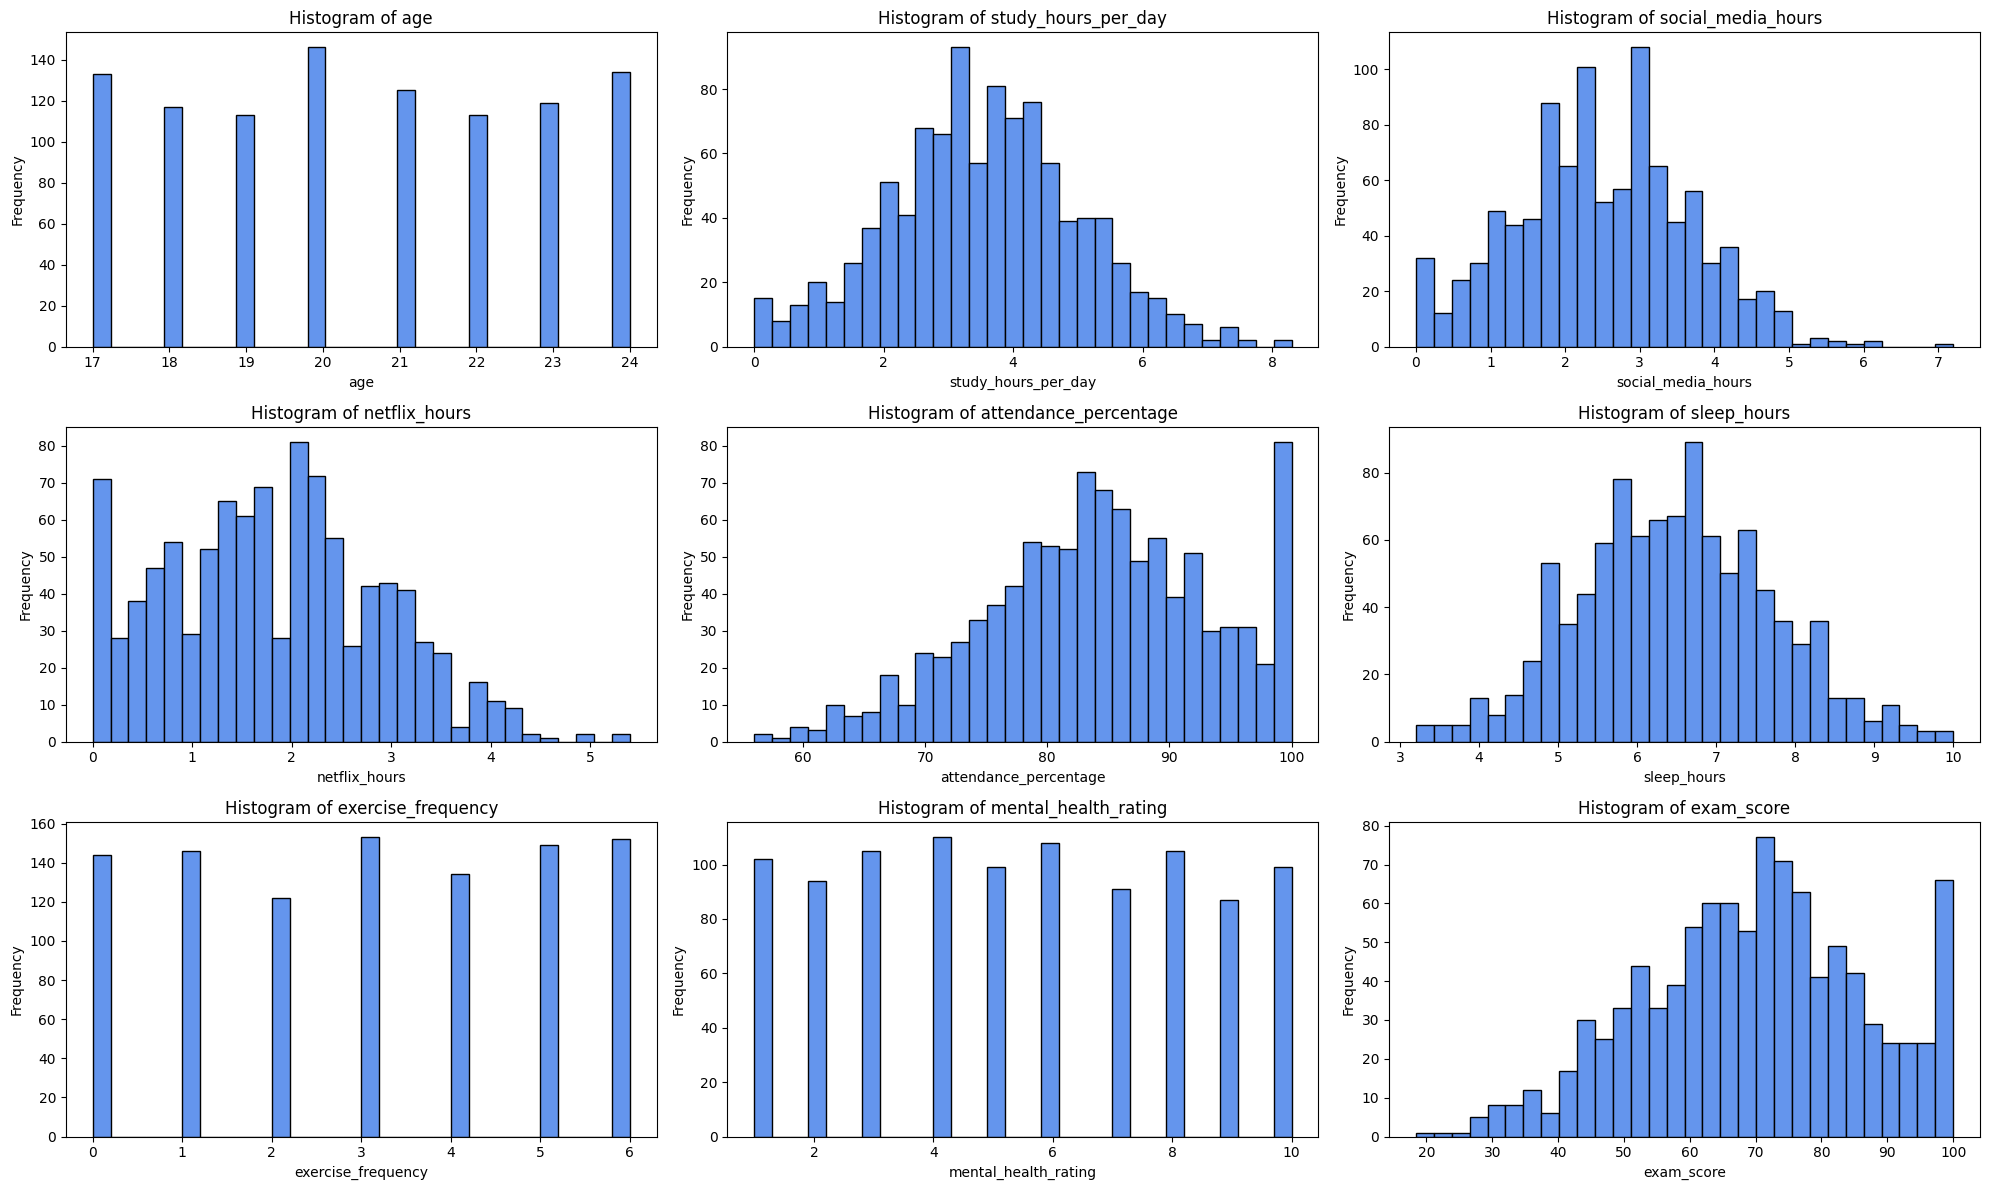

In [10]:
# Observing Histograms (numerical data)

# creating a 3x3 grid for the plots
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

# flattening the axes array to iterate over it easily
axes = axes.flatten()

# looping through the numerical columns and plotting the histograms and column charts
for i, column in enumerate(numerical_columns):

    axes[i].hist(data[column], bins=30, color='cornflowerblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

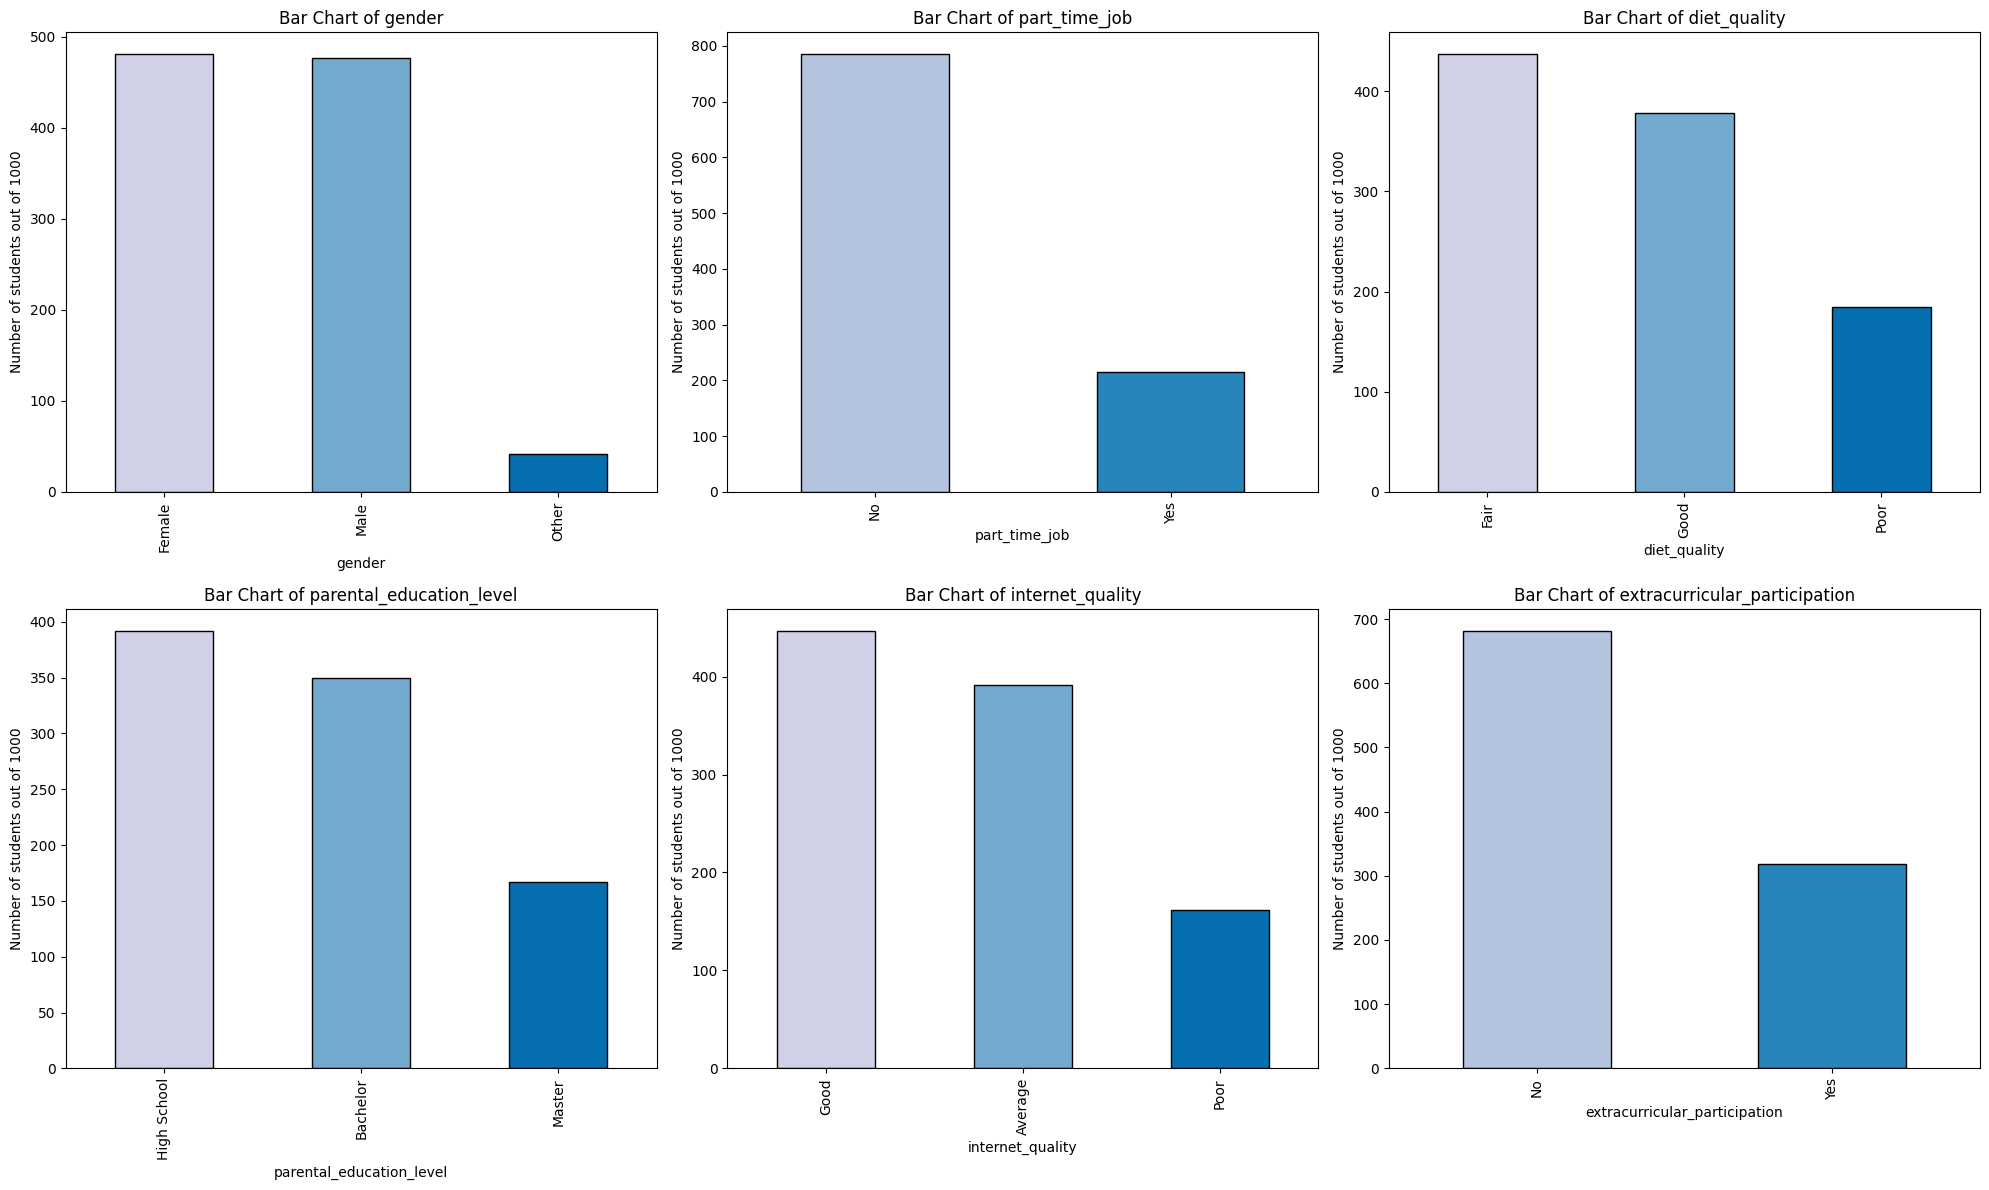

In [11]:
# Observing Bar Charts (categorical data) as bar charts use separate, distinct bars to represent different categories

# defining categorical columns
categorical_columns = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

# creating a grid for the plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    counts = data[column].value_counts()
    colors = sns.color_palette('PuBu', len(counts))
    counts.plot(kind='bar', ax=axes[i], color=colors, edgecolor='black')
    axes[i].set_title(f'Bar Chart of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Number of students out of 1000')

plt.tight_layout()
plt.show()

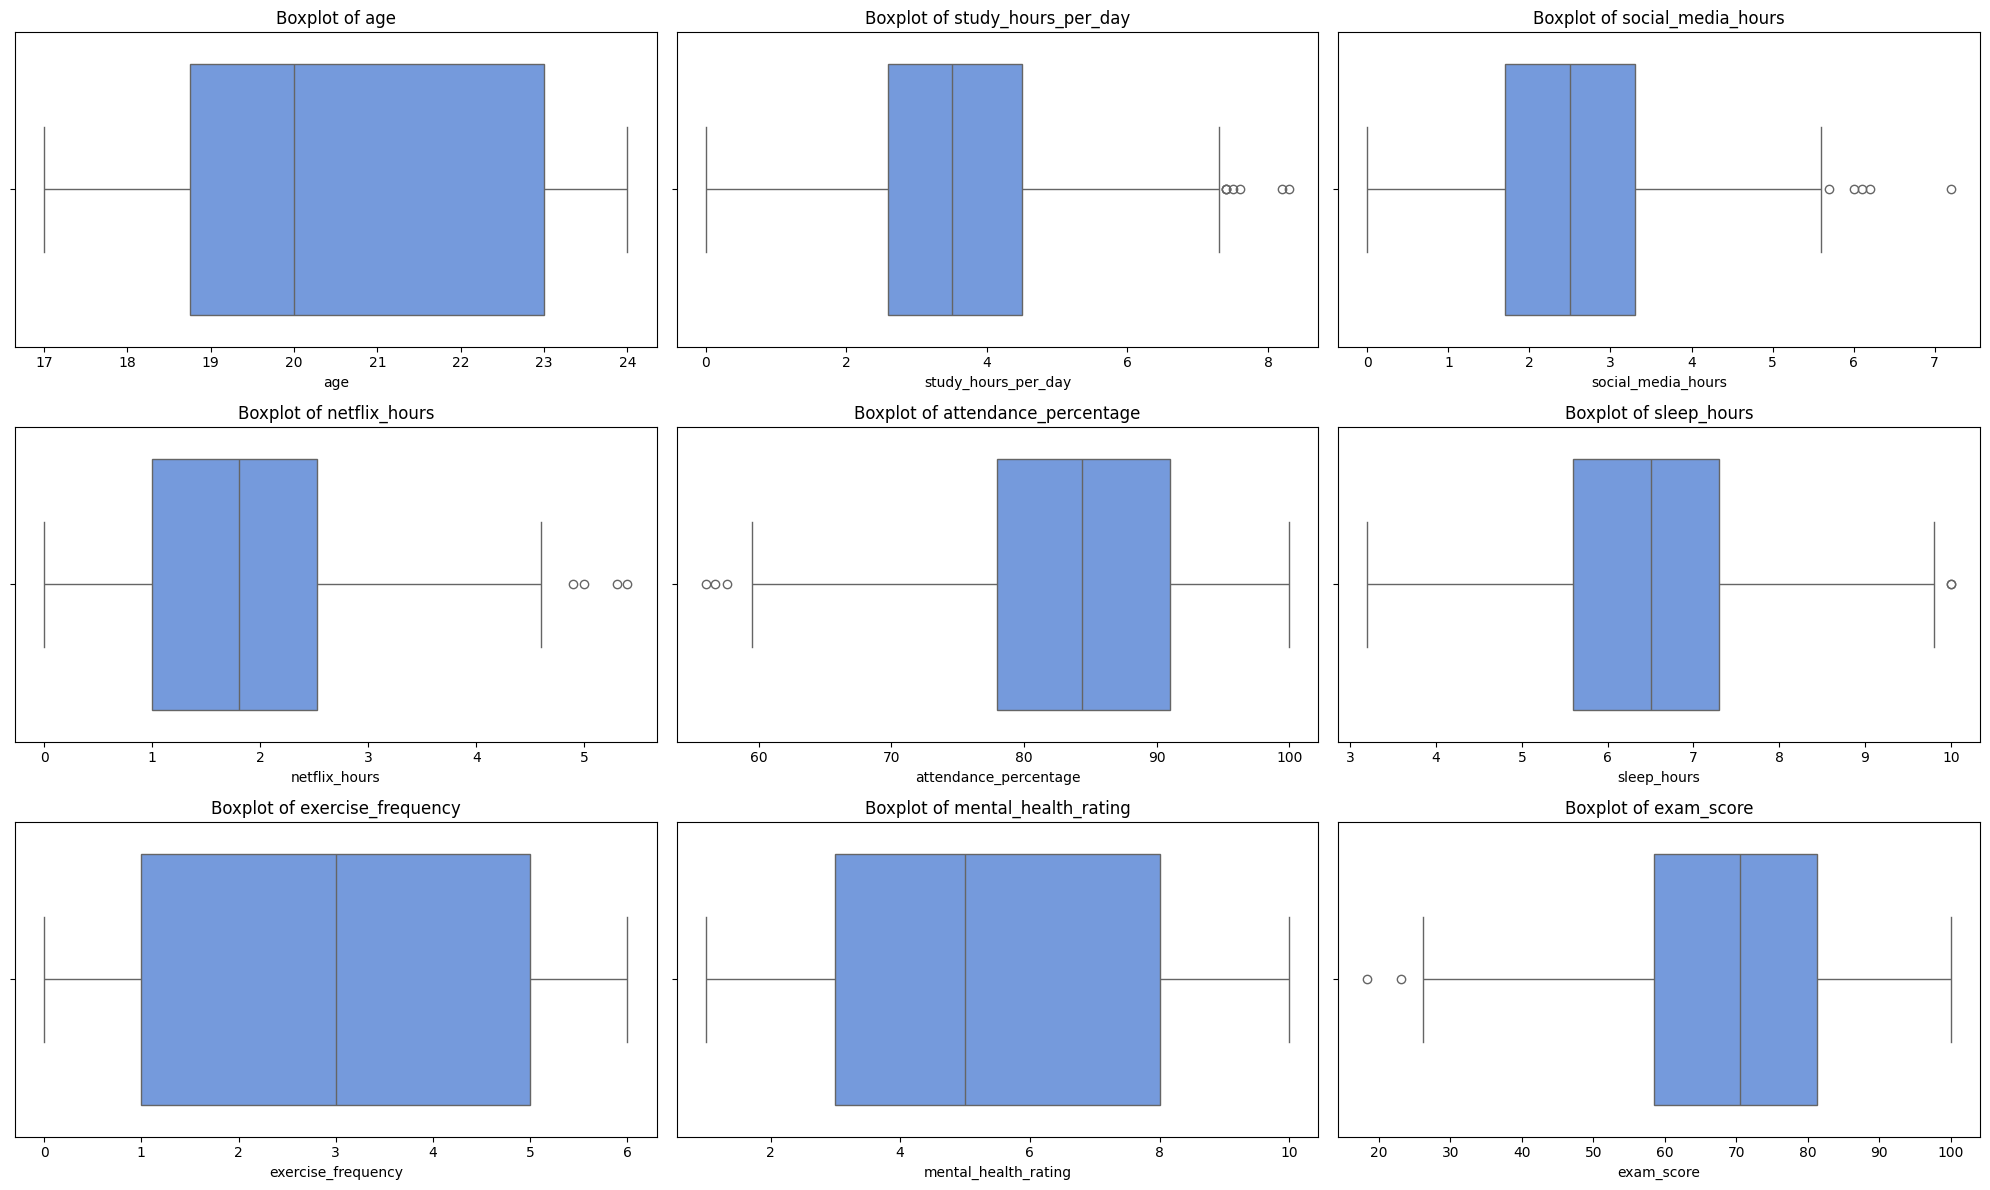

In [12]:
# checking for outliers

# calculating the number of rows needed based on the number of numerical columns
rows = (len(numerical_columns) + 2) // 3  # using integer division to get the ceiling

fig, axes = plt.subplots(rows, 3, figsize=(20, rows * 4))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=data[column], color='cornflowerblue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)

for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

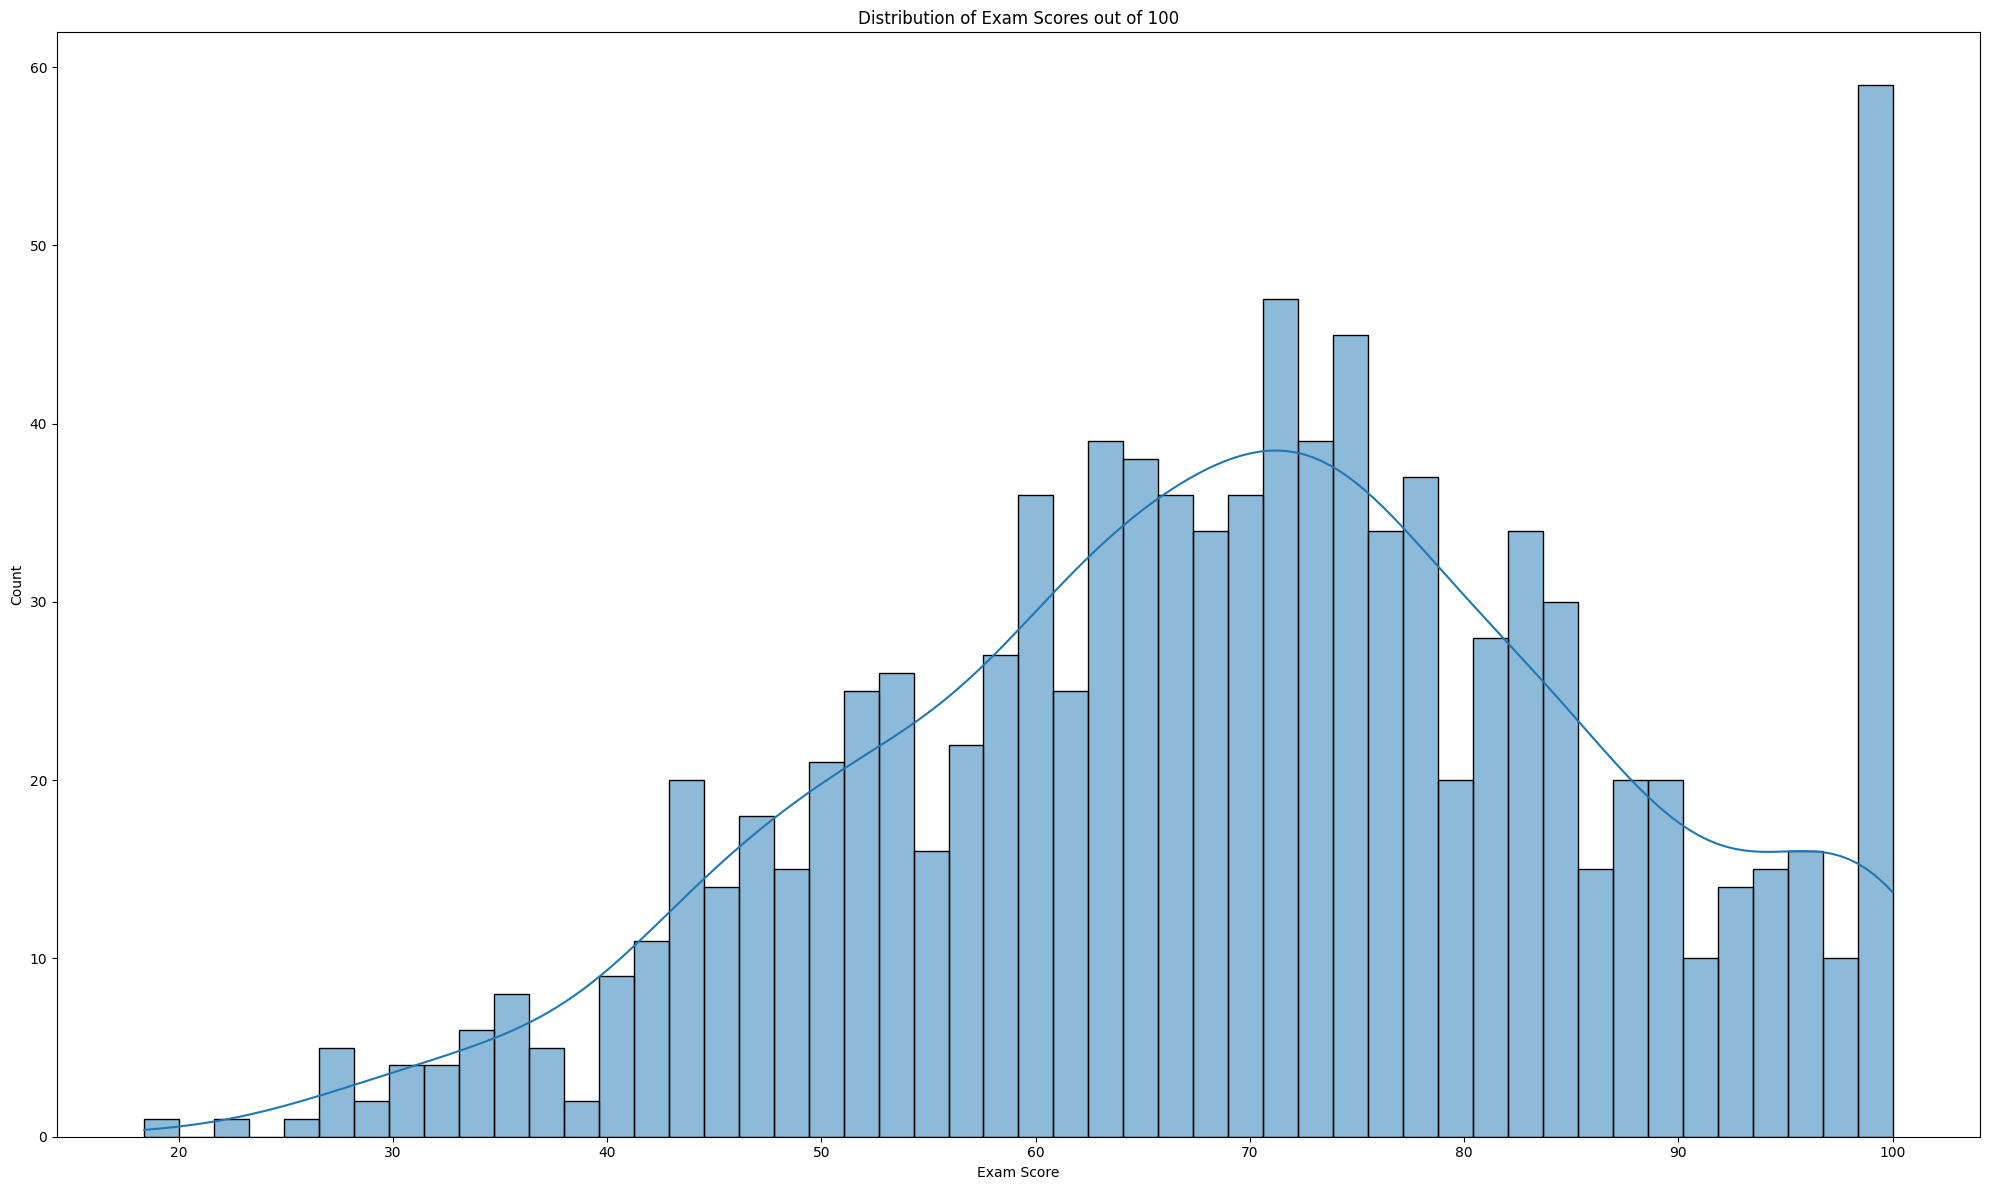

In [13]:
# Quick look at target distribution (Exam Score)
plt.figure(figsize=(20, 12))
sns.histplot(data["exam_score"], bins=50, kde=True)
plt.title("Distribution of Exam Scores out of 100")
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Let's examine the Correlation Matrix

In [14]:
# checking correlations between numeric variables
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
student_id,1.000000,-0.028505,-0.026012,-0.037516,-0.030793,-0.072613,-0.065830,-0.007175,0.037973,-0.021489
age,-0.028505,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,-0.026012,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.037516,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.030793,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.072613,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,-0.065830,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.007175,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,0.037973,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.021489,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


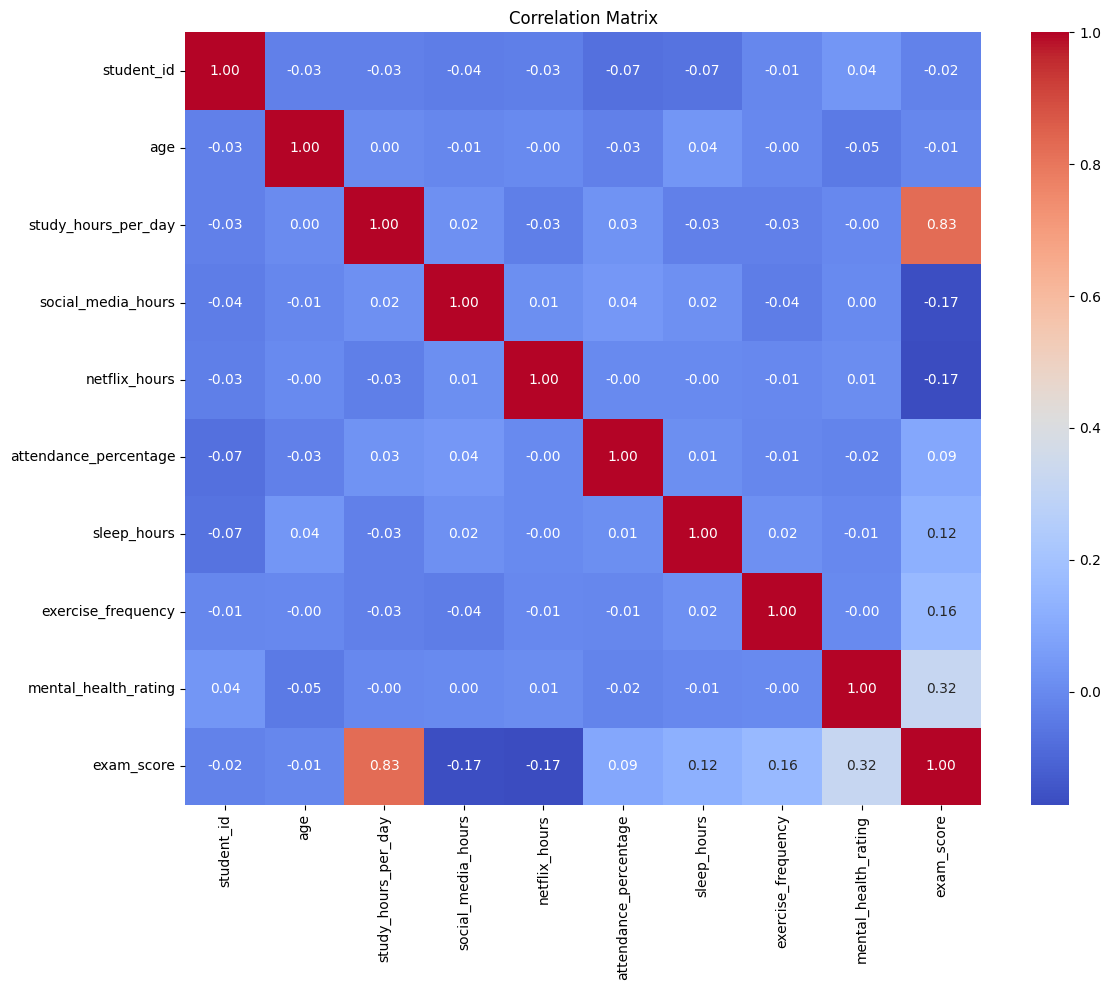

In [15]:
# visualizing the correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Step 02: Data Preprocessing

In [16]:
# checking for missing values
missing_values = data.isnull().sum()
missing_values

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [17]:
# initializing the SimpleImputer with strategy='most_frequent' #MODE IMPUTATION
imputer = SimpleImputer(strategy='most_frequent')

# fitting and transforming the "parental_education_level" column
# extracting the column as a 2D array for SimpleImputer (to deal with the  dimension mismatch)
data_2d = data[['parental_education_level']]

# applying fit_transform to convert back to 1D array
data['parental_education_level'] = imputer.fit_transform(data_2d).ravel()

# print the data after imputation
print(data)

     student_id  age  gender  study_hours_per_day  social_media_hours  \
0          1000   23  Female                  0.0                 1.2   
1          1001   20  Female                  6.9                 2.8   
2          1002   21    Male                  1.4                 3.1   
3          1003   23  Female                  1.0                 3.9   
4          1004   19  Female                  5.0                 4.4   
..          ...  ...     ...                  ...                 ...   
995        1995   21  Female                  2.6                 0.5   
996        1996   17  Female                  2.9                 1.0   
997        1997   20    Male                  3.0                 2.6   
998        1998   24    Male                  5.4                 4.1   
999        1999   19  Female                  4.3                 2.9   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0              1.1            No                   

In [18]:
# checking for any missing values after imputation
data.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [19]:
# one hot encoding (OHE)
from sklearn.preprocessing import OneHotEncoder

# list of categorical columns (6 categorical columns)
categorical_cols = [
    'gender',
    'part_time_job',
    'diet_quality',
    'parental_education_level',
    'internet_quality',
    'extracurricular_participation'
]
# initializing encoder without handling unknowns (as we already dealt with unknown values previously)
encoder = OneHotEncoder(sparse_output=False)

# fit and transform (one-hot encode categorical columns)
encoded_array = encoder.fit_transform(data[categorical_cols])

# get new column names
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# convert back to DataFrame (create DataFrame from encoded data)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=data.index)

# concatenate with original dataset
all_data = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)

print("shape before encoding:", data.shape)
print("shape after encoding:", all_data.shape)

shape before encoding: (1000, 16)
shape after encoding: (1000, 26)


In [20]:
all_data.head()

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,...,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,internet_quality_Average,internet_quality_Good,internet_quality_Poor,extracurricular_participation_No,extracurricular_participation_Yes
0,1000,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1001,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1002,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1003,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1004,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [21]:
# checking unique categories each feature has → to validate encoded columns = 26
for col in categorical_cols:
    print(col, ":", data[col].nunique(), "categories ->", data[col].unique())

gender : 3 categories -> ['Female' 'Male' 'Other']
part_time_job : 2 categories -> ['No' 'Yes']
diet_quality : 3 categories -> ['Fair' 'Good' 'Poor']
parental_education_level : 3 categories -> ['Master' 'High School' 'Bachelor']
internet_quality : 3 categories -> ['Average' 'Poor' 'Good']
extracurricular_participation : 2 categories -> ['Yes' 'No']


In [22]:
len(all_data.columns)

26

In [23]:
# calculating correlations
correlation_matrix = all_data.corr()

In [24]:
# checking null values
all_data.isnull().values.any()

np.False_

In [25]:
# checking for missing values
missing_values = all_data.isnull().sum()
missing_values

,0
student_id,0
age,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
attendance_percentage,0
sleep_hours,0
exercise_frequency,0
mental_health_rating,0
exam_score,0


In [26]:
# summary statistics of all data (after encoding)
all_data.describe()

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,...,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,internet_quality_Average,internet_quality_Good,internet_quality_Poor,extracurricular_participation_No,extracurricular_participation_Yes
count,1000.000000,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1499.500000,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500,...,0.37800,0.185000,0.350000,0.483000,0.167000,0.391000,0.447000,0.162000,0.682000,0.318000
std,288.819436,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564,...,0.48513,0.388492,0.477208,0.499961,0.373162,0.488219,0.497432,0.368635,0.465932,0.465932
min,1000.000000,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1249.750000,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1499.500000,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1749.250000,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000,...,1.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1999.000000,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
correlation_matrix

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,...,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,internet_quality_Average,internet_quality_Good,internet_quality_Poor,extracurricular_participation_No,extracurricular_participation_Yes
student_id,1.000000,-0.028505,-0.026012,-0.037516,-0.030793,-0.072613,-0.065830,-0.007175,0.037973,-0.021489,...,-0.009623,0.026822,-0.036691,0.026672,0.011187,-0.002730,0.005849,-0.004278,-0.027478,0.027478
age,-0.028505,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907,...,-0.002006,-0.010192,0.032444,-0.027354,-0.004842,-0.049495,0.029987,0.025087,0.004993,-0.004993
study_hours_per_day,-0.026012,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419,...,-0.003565,-0.066777,-0.022470,0.014723,0.009009,0.018440,0.001514,-0.026465,0.003264,-0.003264
social_media_hours,-0.037516,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733,...,0.026084,0.011390,-0.036543,0.029276,0.007508,-0.039086,0.046071,-0.010402,0.018597,-0.018597
netflix_hours,-0.030793,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779,...,0.002406,0.021463,-0.002332,0.008166,-0.007959,-0.003247,0.030498,-0.036854,0.005125,-0.005125
attendance_percentage,-0.072613,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836,...,-0.061024,0.033262,0.032762,0.022875,-0.072545,-0.015399,-0.021596,0.049536,0.017778,-0.017778
sleep_hours,-0.065830,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683,...,-0.024224,0.034733,0.026965,-0.026706,0.001298,0.007508,-0.002190,-0.006988,-0.027693,0.027693
exercise_frequency,-0.007175,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107,...,0.024576,0.020647,0.009631,0.020476,-0.039751,0.010708,-0.030575,0.027076,0.005681,-0.005681
mental_health_rating,0.037973,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523,...,0.056837,0.019880,0.076391,-0.007421,-0.087748,0.043017,-0.056385,0.019114,0.004741,-0.004741
exam_score,-0.021489,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000,...,-0.010857,-0.041602,0.029172,0.002143,-0.040177,0.049485,-0.050804,0.003016,-0.000881,0.000881


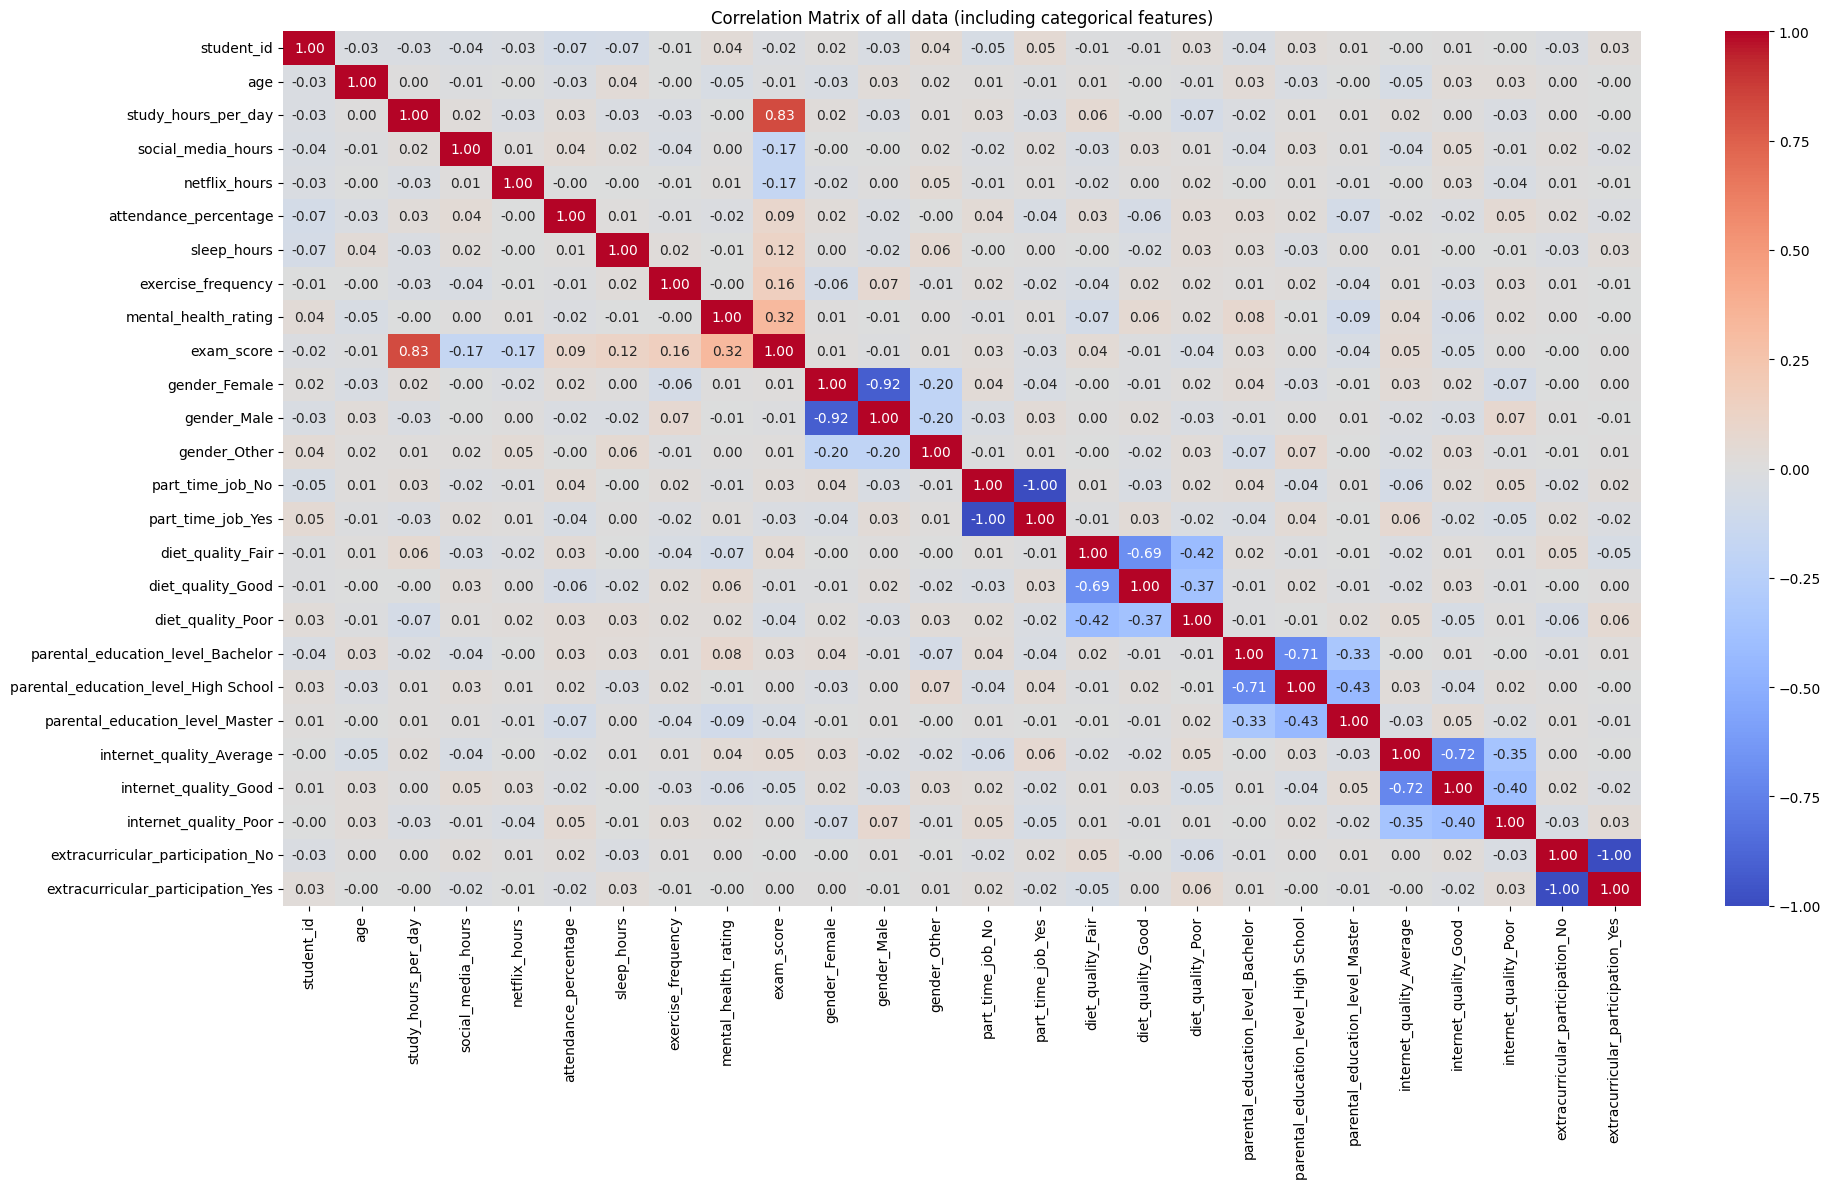

In [28]:
plt.figure(figsize=(20, 12))
sns.heatmap(all_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of all data (including categorical features)')
plt.tight_layout()
plt.show()

In [29]:
# Export DataFrame to CSV
all_data.to_csv('cdata.csv', index=False)  # index=False prevents pandas from writing row indices (saves the dataset to a CSV file with only the data, no extra row numbers)

Step 03: Feature/Target Split

In [30]:
# Preparing the features (X) and target (y)
X = all_data.drop(columns=["student_id", "exam_score"])
y = all_data["exam_score"]

Step 04: Normalizing the data using StandardScaler

In [31]:
# Normalizing using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # scaling is not applied to all_data, which includes the target variable, that is the (exam_score). That’s why we only scaled the features (X).

Step 05: Splitting the data into training and testing sets (80-20 split)

In [32]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Step 06: Applying Different Models

Step 07: Making Predictions and Evaluating the Models



In [33]:
# Dictionary to store results
results = {}

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results["Random Forest"] = [
    mean_absolute_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_rf),
    np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    mean_absolute_percentage_error(y_test, y_pred_rf),
    r2_score(y_test, y_pred_rf)
]

# XGBoost
xgb_model = XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
results["XGBoost"] = [
    mean_absolute_error(y_test, y_pred_xgb),
    mean_squared_error(y_test, y_pred_xgb),
    np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    mean_absolute_percentage_error(y_test, y_pred_xgb),
    r2_score(y_test, y_pred_xgb)
]

# Decision Tree Regressor Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
results["Decision Tree"] = [
    mean_absolute_error(y_test, y_pred_dt),
    mean_squared_error(y_test, y_pred_dt),
    np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    mean_absolute_percentage_error(y_test, y_pred_dt),
    r2_score(y_test, y_pred_dt)
]

# SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
results["SVR"] = [
    mean_absolute_error(y_test, y_pred_svr),
    mean_squared_error(y_test, y_pred_svr),
    np.sqrt(mean_squared_error(y_test, y_pred_svr)),
    mean_absolute_percentage_error(y_test, y_pred_svr),
    r2_score(y_test, y_pred_svr)
]

# Results Table
results_df = pd.DataFrame(results, index=["MAE", "MSE", "RMSE", "MAPE", "R²"]).T
print(results_df)

                    MAE         MSE       RMSE      MAPE        R²
Random Forest  5.025555   39.395873   6.276613  0.084141  0.846367
XGBoost        4.840586   35.309610   5.942189  0.079304  0.862303
Decision Tree  7.454500   94.114350   9.701255  0.122709  0.632981
SVR            7.772600  105.090527  10.251367  0.142112  0.590177


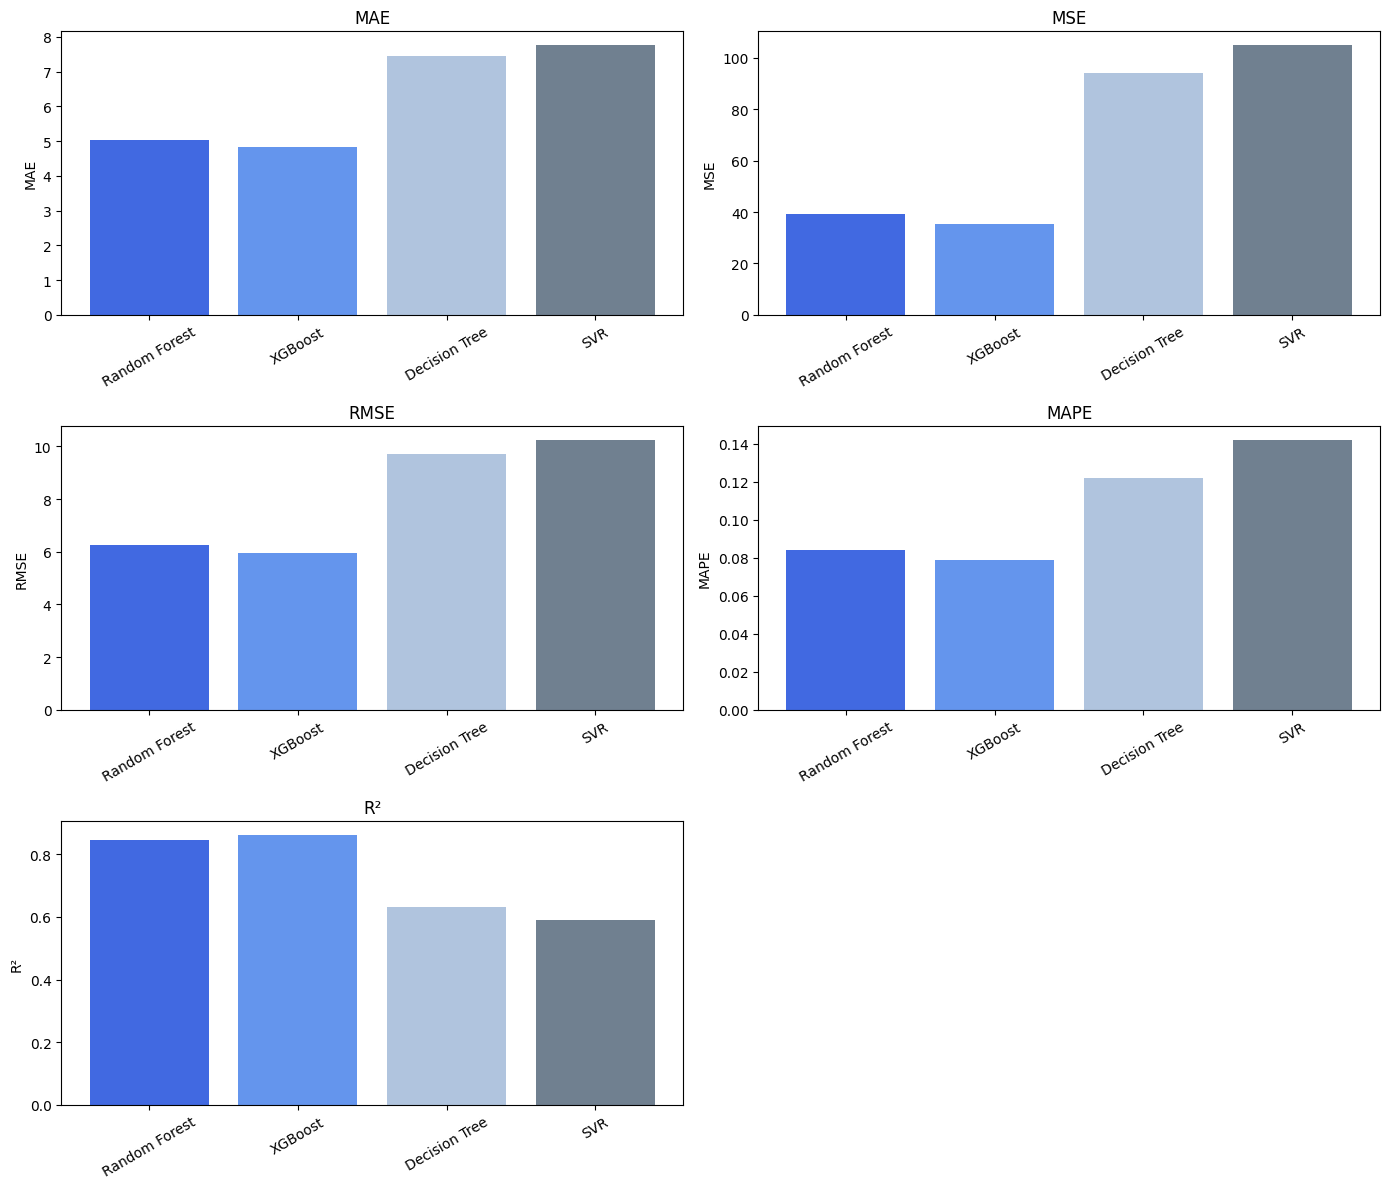

In [34]:
# Models and their metrics (MAE, MSE, RMSE, MAPE, R^2)
models = ["Random Forest", "XGBoost", "Decision Tree", "SVR"]

mae = [5.025, 4.840, 7.454, 7.772]
mse = [39.395, 35.309, 94.114, 105.090]
rmse = [6.276, 5.942, 9.701, 10.251]
mape = [0.084, 0.079,  0.122,  0.142]
r2 = [0.846, 0.862, 0.632, 0.590]

metrics = {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape, "R²": r2}

# Plot grouped bar charts
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, (metric, values) in enumerate(metrics.items()):
    # Create x positions for the bars (0, 1, 2, 3)
    x_pos = range(len(models))
    axes[i].bar(x_pos, values, color=["royalblue", "cornflowerblue", "lightsteelblue", "slategrey"])
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(x_pos)
    axes[i].set_xticklabels(models, rotation=30)

# removing the last empty subplot (since we have 5 metrics, not 6)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Optimization for the applied Models (respectively)

In [35]:
# Optimizing Random Forest

rf = RandomForestRegressor(random_state=42)

param_dist_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf,
    n_iter=10, cv=3, scoring='r2',
    n_jobs=-1, verbose=1, random_state=42
)

random_search_rf.fit(X_train, y_train)

# Evaluating Random Forest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Test MAE: {mae_rf:.4f}")
print(f"Random Forest Test MSE: {mse_rf:.4f}")
print(f"Random Forest Test RMSE: {rmse_rf:.4f}")
print(f"Random Forest Test MAPE: {mape_rf:.4f}")
print(f"Random Forest Test R²: {r2_rf:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest Test MAE: 6.4049
Random Forest Test MSE: 69.8552
Random Forest Test RMSE: 8.3579
Random Forest Test MAPE: 0.1159
Random Forest Test R²: 0.7276


In [36]:
# Base model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Hyperparameter grid
param_dist_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10]
}

# Randomized search
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=15, cv=3, scoring='r2',
    n_jobs=-1, verbose=1, random_state=42
)

# Fit search
random_search_xgb.fit(X_train, y_train)

# Best model
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Test MAE: {mae_xgb:.4f}")
print(f"XGBoost Test MSE: {mse_xgb:.4f}")
print(f"XGBoost Test RMSE: {rmse_xgb:.4f}")
print(f"XGBoost Test MAPE: {mape_xgb:.4f}")
print(f"XGBoost Test R²: {r2_xgb:.4f}")

Fitting 3 folds for each of 15 candidates, totalling 45 fits
XGBoost Test MAE: 4.3772
XGBoost Test MSE: 28.2949
XGBoost Test RMSE: 5.3193
XGBoost Test MAPE: 0.0716
XGBoost Test R²: 0.8897


In [37]:
# Optimizing Decision Tree
dt = DecisionTreeRegressor(random_state=42)

param_dist_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_dt = RandomizedSearchCV(
    dt, param_distributions=param_dist_dt,
    n_iter=6, cv=3, scoring='r2',
    n_jobs=-1, verbose=1, random_state=42
)

random_search_dt.fit(X_train, y_train)

# Evaluating Decision Tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

best_dt = random_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Test MAE: {mae_dt:.4f}")
print(f"Test MSE: {mse_dt:.4f}")
print(f"Test RMSE: {rmse_dt:.4f}")
print(f"Test MAPE: {mape_dt:.4f}")
print(f"Test R²: {r2_dt:.4f}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Test MAE: 7.0255
Test MSE: 79.6863
Test RMSE: 8.9267
Test MAPE: 0.1159
Test R²: 0.6892


In [38]:
# Optimizing SVR
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

param_dist_svr = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'svr__kernel': ['rbf', 'linear', 'poly'],
    'svr__epsilon': [0.01, 0.1, 0.2, 0.5]
}

random_search_svr = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist_svr,
    n_iter=10, cv=3, scoring='r2',
    n_jobs=-1, verbose=1, random_state=42
)

random_search_svr.fit(X_train, y_train)

# Best SVR model
best_svr = random_search_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test)

# Evaluate SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR Test MAE: {mae_svr:.4f}")
print(f"SVR Test MSE: {mse_svr:.4f}")
print(f"SVR Test RMSE: {rmse_svr:.4f}")
print(f"SVR Test MAPE: {mape_svr:.4f}")
print(f"SVR Test R²: {r2_svr:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
SVR Test MAE: 4.2935
SVR Test MSE: 27.7987
SVR Test RMSE: 5.2724
SVR Test MAPE: 0.0710
SVR Test R²: 0.8916


,MAE,MSE,RMSE,MAPE,R²
Random Forest,6.404868,69.855221,8.357944,0.115852,0.727585
XGBoost,4.377205,28.294937,5.319299,0.071625,0.889658
Decision Tree,7.025490,79.686340,8.926721,0.115899,0.689246
SVR,4.293510,27.798665,5.272444,0.070959,0.891593


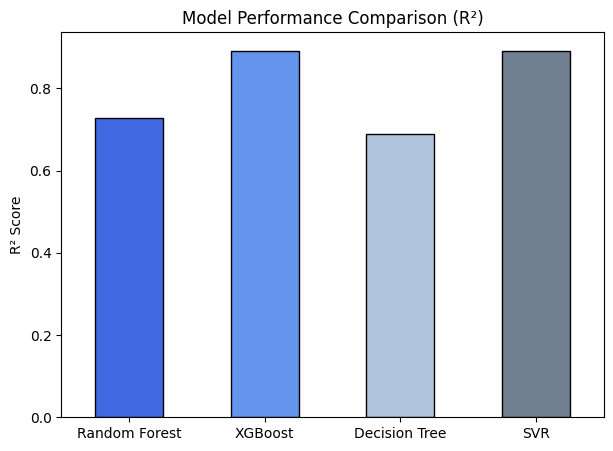

In [39]:
# Results dictionary with optimized models
results = {
    "Random Forest": {
        "MAE": mae_rf,
        "MSE": mse_rf,
        "RMSE": rmse_rf,
        "MAPE": mape_rf,
        "R²": r2_rf,
    },
    "XGBoost": {
        "MAE": mae_xgb,
        "MSE": mse_xgb,
        "RMSE": rmse_xgb,
        "MAPE": mape_xgb,
        "R²": r2_xgb,
    },
    "Decision Tree": {
        "MAE": mae_dt,
        "MSE": mse_dt,
        "RMSE": rmse_dt,
        "MAPE": mape_dt,
        "R²": r2_dt,
    },
    "SVR": {
        "MAE": mae_svr,
        "MSE": mse_svr,
        "RMSE": rmse_svr,
        "MAPE": mape_svr,
        "R²": r2_svr,
    }
}

# Convert to DataFrame
df_results = pd.DataFrame(results).T

# Display table
display(df_results)

# Plot comparison (R² only for clarity)
df_results["R²"].plot(kind="bar", figsize=(7,5),
                      color=["royalblue", "cornflowerblue", "lightsteelblue", "slategrey"],
                      edgecolor="black")
plt.title("Model Performance Comparison (R²)")
plt.ylabel("R² Score")
plt.xticks(rotation=0)
plt.show()

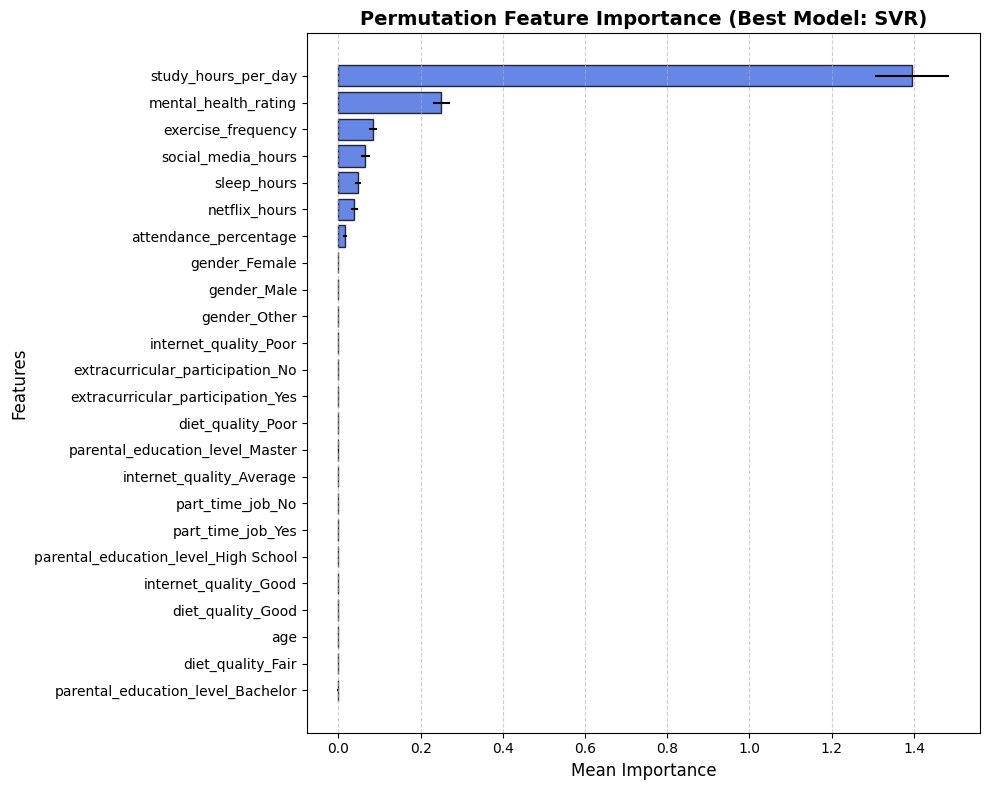

,Feature,Mean Importance,Std Dev
0,study_hours_per_day,1.395438,0.090760
1,mental_health_rating,0.250315,0.020212
2,exercise_frequency,0.083646,0.009351
3,social_media_hours,0.065014,0.011022
4,sleep_hours,0.048602,0.007267
5,netflix_hours,0.039273,0.007568
6,attendance_percentage,0.017373,0.004820
7,gender_Female,0.000044,0.000065
8,gender_Male,0.000036,0.000072
9,gender_Other,-0.000002,0.000005


In [40]:
from sklearn.inspection import permutation_importance

# Ensure feature names match your training data
feature_names = X.columns

# Calculate permutation importance
perm_importance = permutation_importance(
    best_svr, X_test, y_test,
    n_repeats=30, random_state=42, n_jobs=-1
)

# Sort features by importance (descending)
sorted_idx = np.argsort(perm_importance.importances_mean)[::-1]

# --- Plot horizontal bar chart ---
plt.figure(figsize=(10, 8))
plt.barh(
    feature_names[sorted_idx],
    perm_importance.importances_mean[sorted_idx],
    xerr=perm_importance.importances_std[sorted_idx],
    color="royalblue", edgecolor="black", alpha=0.8
)
plt.gca().invert_yaxis()
plt.title("Permutation Feature Importance (Best Model: SVR)", fontsize=14, weight="bold")
plt.xlabel("Mean Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- Table of top 10 features ---
import pandas as pd

importance_df = pd.DataFrame({
    "Feature": feature_names[sorted_idx],
    "Mean Importance": perm_importance.importances_mean[sorted_idx],
    "Std Dev": perm_importance.importances_std[sorted_idx]
})

top10_features = importance_df.head(10)
display(top10_features.style.background_gradient(cmap="Blues", subset=["Mean Importance"]))

# **Academic Performance Prediction Report**

**Problem Statement:** Predicting student academic performance is a critical task in the education sector, as it allows educators to identify at-risk students, optimize learning strategies, and provide timely interventions. The goal of this project was to build machine learning models capable of accurately predicting students’ exam scores using demographic, behavioral, and academic features.

**Business/Educational Impact:**

*   Early identification of at-risk students.
*   Personalized learning recommendations based on key predictors
*   Personalized learning recommendations based on key predictors.
*   Data-driven decision-making for educators and administrators.

**Methodology**

1. Dataset Preparation: Data was cleaned, standardized, and split into training (80%) and testing (20%). Feature scaling was applied where necessary (e.g., for SVR).

2. Models Evaluated:Random Forest Regressor, XGBoost Regressor, Decision Tree Regressor
Support Vector Regressor

3. Evaluation Metrics: Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
Mean Absolute Percentage Error (MAPE)
R² Score (goodness of fit)

4. Feature Importance:Permutation Importance was used to identify the most influential features in the best-performing model (SVR).

**SVR outperformed all other models, achieving the highest R² and lowest error rates.** Decision Tree showed relatively weaker generalization due to overfitting. Random Forest and XGBoost performed competitively but were slightly less accurate than SVR.

**Key Findings:**

SVR was identified as the best predictive model for academic performance.

The most influential features included ***study hours per day, mental health rating and exercise frequency***; which strongly impact exam outcomes.

These findings suggest that targeted interventions on these key factors could improve student performance.

**Conclusion:**

This study demonstrates the effectiveness of machine learning in predicting student academic performance. The SVR model, optimized with appropriate hyperparameters, provided the most reliable predictions.

*Future improvements could involve expanding the dataset, testing deep learning models, and incorporating time-series student progress data.*